## Real Estate -Price predictor


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("datafinal.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632
1,0.00906,90.00000,2.97000,0.00000,0.40000,7.08800,20.80000,7.30730,1.00000,285.00000,15.30000,394.72000,7.85000,32.20000
2,0.01096,55.00000,2.25000,0.00000,0.38900,6.45300,31.90000,7.30730,1.00000,300.00000,15.30000,394.72000,8.23000,22.00000
3,0.01301,35.00000,1.52000,0.00000,0.44200,7.24100,49.30000,7.03790,1.00000,284.00000,15.50000,394.74000,5.49000,32.70000
4,0.01311,90.00000,1.22000,0.00000,0.40300,7.24900,21.90000,8.69660,5.00000,226.00000,17.90000,395.93000,4.81000,35.40000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0.00000    470
1.00000     35
0.00632      1
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.328076,11.132226,0.069182,0.553644,6.271653,68.446060,3.786972,9.547443,407.652186,18.425309,355.889657,12.643234,22.485388
std,8.601545,23.326032,6.866983,0.253991,0.118412,0.755903,28.313061,2.112393,8.709303,169.438710,2.310923,92.643598,7.155053,9.251219
min,0.006320,0.000000,0.006320,0.000000,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884250,44.550000,2.091150,4.000000,279.000000,17.400000,375.240000,6.950000,16.850000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.190950,5.000000,330.000000,19.050000,391.385000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.210000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

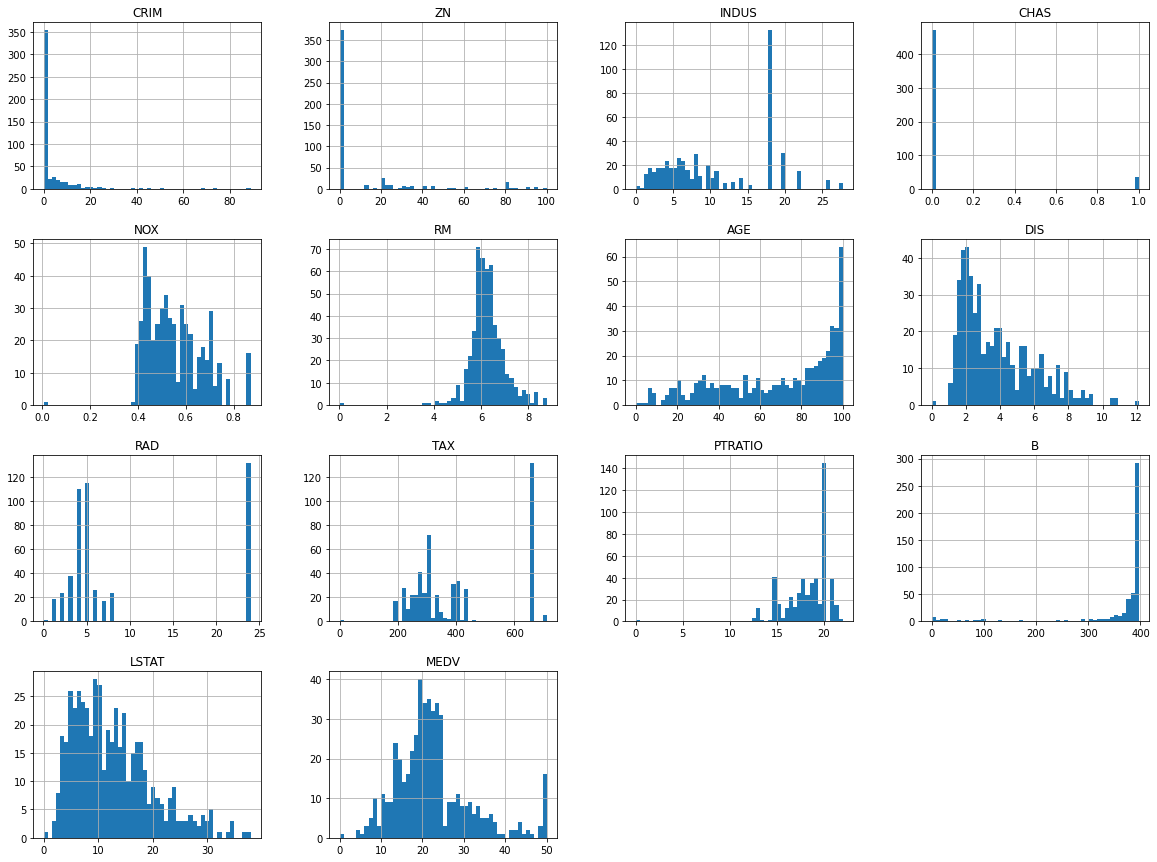

In [9]:
housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [10]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]    

In [11]:
#train_set, test_set = split_train_test(housing, 0.2)

In [12]:
#print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train set : {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set : 404
Rows in test set: 102



## Looking for correlation

In [14]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.682401
ZN         0.360532
B          0.345067
DIS        0.256265
CHAS       0.175516
AGE       -0.360885
RAD       -0.373714
CRIM      -0.383879
NOX       -0.393400
PTRATIO   -0.434072
TAX       -0.451509
INDUS     -0.472216
LSTAT     -0.723061
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot:xlabel='INDUS', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='INDUS', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='INDUS

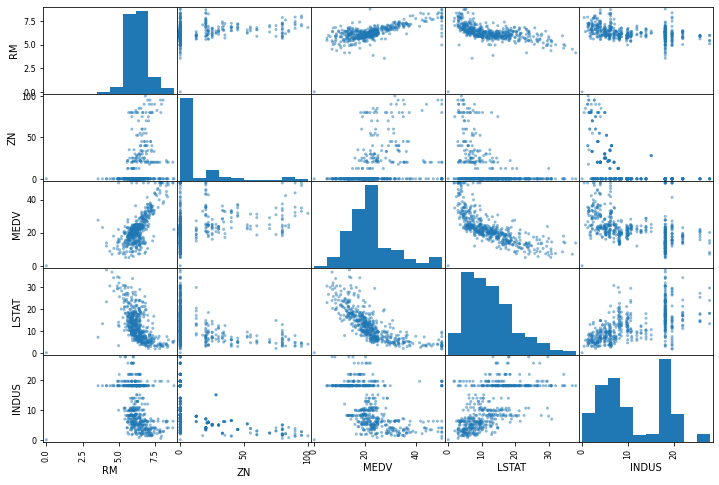

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["RM", "ZN", "MEDV", "LSTAT", "INDUS"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

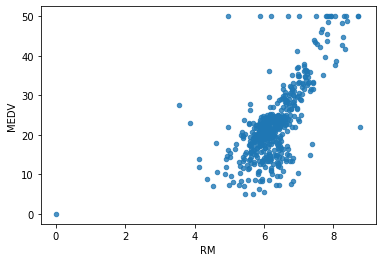

In [16]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Attribute Combination(Trying out)

In [17]:
housing["TAXRM"]= housing['TAX']/housing['RM']

In [18]:
housing["TAXRM"]

0        1.000000
1       40.208804
2       46.490005
3       39.221102
4       31.176714
          ...    
501    147.377738
502    115.685253
503    117.191624
504    111.801242
505     95.579793
Name: TAXRM, Length: 506, dtype: float64

In [19]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,1.000000
1,0.00906,90.00000,2.97000,0.00000,0.40000,7.08800,20.80000,7.30730,1.00000,285.00000,15.30000,394.72000,7.85000,32.20000,40.208804
2,0.01096,55.00000,2.25000,0.00000,0.38900,6.45300,31.90000,7.30730,1.00000,300.00000,15.30000,394.72000,8.23000,22.00000,46.490005
3,0.01301,35.00000,1.52000,0.00000,0.44200,7.24100,49.30000,7.03790,1.00000,284.00000,15.50000,394.74000,5.49000,32.70000,39.221102
4,0.01311,90.00000,1.22000,0.00000,0.40300,7.24900,21.90000,8.69660,5.00000,226.00000,17.90000,395.93000,4.81000,35.40000,31.176714


In [20]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.682401
ZN         0.360532
B          0.345067
DIS        0.256265
CHAS       0.175516
AGE       -0.360885
RAD       -0.373714
CRIM      -0.383879
NOX       -0.393400
PTRATIO   -0.434072
TAX       -0.451509
INDUS     -0.472216
TAXRM     -0.522171
LSTAT     -0.723061
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

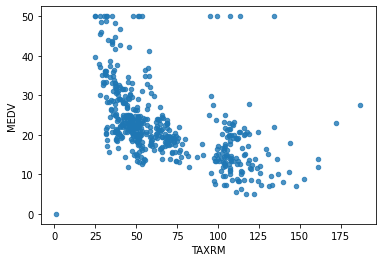

In [21]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [22]:
housing =train_set.drop("MEDV",axis=1)
housing_labels=train_set["MEDV"].copy()

## Creating a Pipeline


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])


In [24]:
housing_num = my_pipeline.fit_transform(housing)

In [25]:
housing_num #numpyarray

array([[ 1.36238896, -0.49297662,  1.02967982, ...,  0.83272185,
        -3.87438485,  2.0202982 ],
       [-0.38822305,  0.25024648, -1.41852122, ...,  0.10816753,
         0.38910439, -0.63579146],
       [-0.27470004, -0.49297662, -0.42869831, ...,  1.19499902,
         0.24462639, -0.06848535],
       ...,
       [-0.22146802, -0.49297662,  1.24638661, ..., -1.65793363,
         0.18021652, -1.54810051],
       [ 0.590308  , -0.49297662,  1.02967982, ...,  0.83272185,
        -3.05116007,  0.74855092],
       [-0.38300853,  2.47991578, -1.292597  , ..., -1.61264899,
         0.11147564, -1.08039777]])

## Selecting a model for Real Estate

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num, housing_labels)

RandomForestRegressor()

In [27]:
some_data = housing.iloc[:5]

In [28]:
some_labels= housing_labels.iloc[:5]

In [29]:
prepared_data =my_pipeline.transform(some_data)

In [30]:
model.predict(prepared_data)

array([ 9.021, 32.987, 21.53 , 11.697, 43.801])

In [31]:
list(some_labels)

[8.7, 33.0, 21.0, 11.0, 42.3]

## Evaluting the model

In [32]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num)
mse = mean_squared_error(housing_labels, housing_prediction)
rmse= np.sqrt(mse)

In [33]:
mse

1.494027339108908

## Using better evalution technique - Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num, housing_labels, scoring="neg_mean_squared_error" , cv=10)
rmse_scores = np.sqrt(-scores)

In [35]:
rmse_scores

array([3.16860872, 2.23374068, 3.06793397, 3.34621266, 4.35876585,
       3.21336221, 3.16218783, 2.00569254, 3.75670599, 3.06295642])

In [36]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:",scores.mean())
    print("Standard deviation:", scores.std())

In [37]:
print_scores(rmse_scores)

Scores: [3.16860872 2.23374068 3.06793397 3.34621266 4.35876585 3.21336221
 3.16218783 2.00569254 3.75670599 3.06295642]
Mean: 3.1376166860327315
Standard deviation: 0.6351350013049453


## Saving the model

In [38]:
from joblib import dump, load
dump(model, 'Estate.joblib')

['Estate.joblib']

## Testing the model on test data

In [39]:
X_test = test_set.drop("MEDV", axis=1)
Y_test = test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions, list(Y_test))

In [40]:
final_rmse

5.207446246107775

In [41]:
prepared_data[0]

array([ 1.36238896, -0.49297662,  1.02967982, -0.28322059,  1.62488748,
       -0.21983571,  1.13022986, -0.90022106,  1.75306802,  1.60783112,
        0.83272185, -3.87438485,  2.0202982 ])

## Using the model

In [42]:
from joblib import dump, load
import numpy as np
model= load('Estate.joblib')
features = np.array([[ 1.36238896, -0.49297662,  1.02967982, -0.28322059,  1.62488748,
       -0.81983571,  99.13022986, -0.90022106,  1.75306802,  1.60783112,
        0.83272185, -3.87438485,  2.0202982 ]])
model.predict(features)

array([9.013])